# WHISKEY DATA SCIENCE PROJECT

Background & Inspiration
------------------------------

Over the years, I’ve tasted a very limited selection of whiskies, and they have tended to be the usual common brands such as Johnnie Walker and Glenlivet. Being a whiskey novice, is there a relationship between price and quality? Whiskey bottles prices range from < $10 to $100,000+. Whiskey prices are dictated by supply, demand, age, brand, etc. My analsis will focus on price and quality.

I was able to web scrape a website called Whiskyadvocate. Whiskyadvocate is a site that “Whisky Advocate (formerly Malt Advocate) is America's leading whisky publication. It's a premier source for whisky information, education and entertainment for whisky enthusiasts”.

Project Goals
----------------
- Is there a strong relationship between price and quality?
- Identify whiskey bottles that cost less than $150 that are of superior quality

Web Scraping Prcess
-------------------------

In order to scrape the website, I used Python Beautfil Soup module to scrape all whiskey reviews. From the reviews page, I was able to extract a list of all whiskies, and for each brand, scrape each brand page. The fields I was able to scrape were as follows:

- Category – Whiskey category
- Brand – Whiskey brand
- Title – Whiskey title
- Alcohol Percentage- Content
- Price: Price of the whiskey bottle (USD)
- Reviewer: Reviewed by
- Review: Rating (out of 100):
        95-100 points—Classic: a great whisky
        90-94 points— Outstanding: a whisky of superior character and style
        85-89 points—Very good: a whisky with special qualities
        80-84 points—Good: a solid, well-made whisky
        75-79—Mediocre: a drinkable whisky that may have minor flaws
        50-74—Not recommended

Create Whiskey Advocate Data Frame
---------------------------------------------

In [148]:
from bs4 import BeautifulSoup
import requests

# Return text from a webpage
def getText(brandId):
    headers = {'User-Agent':
           'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36'
              }
    response = requests.get('https://www.whiskyadvocate.com/ratings-reviews/?search=&submit=+&brand_id={}&rating=0&price=0&category=0&styles_id=0&issue_id=0'.format(brandId),headers = headers)
    text = BeautifulSoup(response.text, 'html.parser')
    return text

In [132]:
import re 

# Dictionaries to extra each data point for a whiskey
whiskey_titles = []
whiskey_prices = []
whiskey_percent = []
whiskey_review = []
whiskey_category = []
whiskey_brand = []
whiskey_reviewer = []
brands_id_f = []
brand_name_f = []

# Read all brand ids and names to query the whiskey advocate website
with open("whiskey_brands.csv", "r", newline=None) as fd:
    for line in fd:
        line = line.replace("\n", "")
        split_names = line.split(',')
        brands_id_f.append(split_names[0])
        brand_name_f.append(split_names[1])

# For each brand, extract all product details - Expect this data pull to take < 10 mins
counter = 0
while (counter < len(brands_id_f)):
    progress = counter/len(brands_id_f) * 100
    print('Load Status Completion: ',progress,'%')
    text = getText(brands_id_f[counter])
    whiskies = text.find_all(attrs = {'class': 'm-all t-1of3 d-1of3 col cf align-items-stretch showmore'})

    # For each product, add to the dictionaries
    for tag in whiskies:
        title = tag.find('h1',attrs={'itemprop':'name'}).text
        price = tag.find('span',attrs={'itemprop':'price'}).text
        review = tag.find('span',attrs={'itemprop':'ratingValue'}).text
       
        # A subset of products do not contain a reviewer - set an empty string
        if ((tag.find('span',attrs={'itemprop':'author'}) != None)):
            reviewer = tag.find('span',attrs={'itemprop':'author'}).text
        else:
            reviewer =""
        category = tag.find('span',attrs={'itemprop':'category'}).text  

        # Clean up price - Price pulled backed contains different formats
        price = price.replace('or','/')
        split_string = price.split("/", 1)
        price = split_string[0]
        price = price.replace('$','')
      
        # Add items to the dictionaries
        whiskey_brand.append(brand_name_f[counter])
        whiskey_titles.append(title)
        whiskey_percent.append((title.split()[-1]))
        whiskey_prices.append(float(price.replace(',','')))
        whiskey_review.append(int(review))
        whiskey_reviewer.append(reviewer)
        whiskey_category.append(category)
    counter += 1

Load Completion:  0.0 %
Load Completion:  0.08833922261484099 %
Load Completion:  0.17667844522968199 %
Load Completion:  0.26501766784452296 %
Load Completion:  0.35335689045936397 %
Load Completion:  0.441696113074205 %
Load Completion:  0.5300353356890459 %
Load Completion:  0.6183745583038869 %
Load Completion:  0.7067137809187279 %
Load Completion:  0.7950530035335688 %
Load Completion:  0.88339222614841 %
Load Completion:  0.9717314487632509 %
Load Completion:  1.0600706713780919 %
Load Completion:  1.1484098939929328 %
Load Completion:  1.2367491166077738 %
Load Completion:  1.325088339222615 %
Load Completion:  1.4134275618374559 %
Load Completion:  1.5017667844522968 %
Load Completion:  1.5901060070671376 %
Load Completion:  1.678445229681979 %
Load Completion:  1.76678445229682 %
Load Completion:  1.8551236749116609 %
Load Completion:  1.9434628975265018 %
Load Completion:  2.0318021201413425 %
Load Completion:  2.1201413427561837 %
Load Completion:  2.208480565371025 %
Load 

Load Completion:  18.90459363957597 %
Load Completion:  18.992932862190813 %
Load Completion:  19.081272084805654 %
Load Completion:  19.169611307420496 %
Load Completion:  19.257950530035338 %
Load Completion:  19.346289752650176 %
Load Completion:  19.434628975265017 %
Load Completion:  19.52296819787986 %
Load Completion:  19.6113074204947 %
Load Completion:  19.699646643109542 %
Load Completion:  19.78798586572438 %
Load Completion:  19.87632508833922 %
Load Completion:  19.964664310954063 %
Load Completion:  20.053003533568905 %
Load Completion:  20.141342756183743 %
Load Completion:  20.229681978798585 %
Load Completion:  20.318021201413426 %
Load Completion:  20.406360424028268 %
Load Completion:  20.49469964664311 %
Load Completion:  20.58303886925795 %
Load Completion:  20.671378091872793 %
Load Completion:  20.759717314487634 %
Load Completion:  20.848056537102476 %
Load Completion:  20.936395759717314 %
Load Completion:  21.024734982332156 %
Load Completion:  21.113074204946

Load Completion:  37.80918727915194 %
Load Completion:  37.897526501766784 %
Load Completion:  37.985865724381625 %
Load Completion:  38.07420494699647 %
Load Completion:  38.16254416961131 %
Load Completion:  38.25088339222615 %
Load Completion:  38.33922261484099 %
Load Completion:  38.42756183745583 %
Load Completion:  38.515901060070675 %
Load Completion:  38.60424028268552 %
Load Completion:  38.69257950530035 %
Load Completion:  38.78091872791519 %
Load Completion:  38.869257950530034 %
Load Completion:  38.957597173144876 %
Load Completion:  39.04593639575972 %
Load Completion:  39.13427561837456 %
Load Completion:  39.2226148409894 %
Load Completion:  39.31095406360424 %
Load Completion:  39.399293286219084 %
Load Completion:  39.48763250883392 %
Load Completion:  39.57597173144876 %
Load Completion:  39.6643109540636 %
Load Completion:  39.75265017667844 %
Load Completion:  39.840989399293285 %
Load Completion:  39.92932862190813 %
Load Completion:  40.01766784452297 %
Load Co

Load Completion:  56.80212014134276 %
Load Completion:  56.8904593639576 %
Load Completion:  56.978798586572445 %
Load Completion:  57.06713780918727 %
Load Completion:  57.155477031802114 %
Load Completion:  57.243816254416956 %
Load Completion:  57.3321554770318 %
Load Completion:  57.42049469964664 %
Load Completion:  57.50883392226148 %
Load Completion:  57.59717314487632 %
Load Completion:  57.685512367491164 %
Load Completion:  57.773851590106005 %
Load Completion:  57.86219081272085 %
Load Completion:  57.95053003533569 %
Load Completion:  58.03886925795053 %
Load Completion:  58.12720848056537 %
Load Completion:  58.21554770318021 %
Load Completion:  58.303886925795055 %
Load Completion:  58.3922261484099 %
Load Completion:  58.48056537102474 %
Load Completion:  58.56890459363958 %
Load Completion:  58.657243816254415 %
Load Completion:  58.745583038869256 %
Load Completion:  58.8339222614841 %
Load Completion:  58.92226148409894 %
Load Completion:  59.01060070671378 %
Load Com

Load Completion:  75.8833922261484 %
Load Completion:  75.97173144876325 %
Load Completion:  76.06007067137809 %
Load Completion:  76.14840989399293 %
Load Completion:  76.23674911660777 %
Load Completion:  76.32508833922262 %
Load Completion:  76.41342756183745 %
Load Completion:  76.5017667844523 %
Load Completion:  76.59010600706713 %
Load Completion:  76.67844522968198 %
Load Completion:  76.76678445229682 %
Load Completion:  76.85512367491167 %
Load Completion:  76.9434628975265 %
Load Completion:  77.03180212014135 %
Load Completion:  77.12014134275618 %
Load Completion:  77.20848056537103 %
Load Completion:  77.29681978798587 %
Load Completion:  77.3851590106007 %
Load Completion:  77.47349823321554 %
Load Completion:  77.56183745583039 %
Load Completion:  77.65017667844522 %
Load Completion:  77.73851590106007 %
Load Completion:  77.8268551236749 %
Load Completion:  77.91519434628975 %
Load Completion:  78.00353356890459 %
Load Completion:  78.09187279151944 %
Load Completion: 

Load Completion:  95.0530035335689 %
Load Completion:  95.14134275618375 %
Load Completion:  95.22968197879858 %
Load Completion:  95.31802120141343 %
Load Completion:  95.40636042402826 %
Load Completion:  95.49469964664311 %
Load Completion:  95.58303886925795 %
Load Completion:  95.6713780918728 %
Load Completion:  95.75971731448763 %
Load Completion:  95.84805653710248 %
Load Completion:  95.93639575971731 %
Load Completion:  96.02473498233216 %
Load Completion:  96.113074204947 %
Load Completion:  96.20141342756183 %
Load Completion:  96.28975265017668 %
Load Completion:  96.37809187279152 %
Load Completion:  96.46643109540636 %
Load Completion:  96.5547703180212 %
Load Completion:  96.64310954063605 %
Load Completion:  96.73144876325088 %
Load Completion:  96.81978798586573 %
Load Completion:  96.90812720848056 %
Load Completion:  96.99646643109541 %
Load Completion:  97.08480565371025 %
Load Completion:  97.1731448763251 %
Load Completion:  97.26148409893993 %
Load Completion:  

In [133]:
import pandas as pd
  
# Create dictionary
details = {
    'Brand' : whiskey_brand,
    'Title' : whiskey_titles,
    'Price' : whiskey_prices,
    'Alcohol_percentage' : whiskey_percent,
    'Review' : whiskey_review,
    'Category' : whiskey_category,
    'Reviewer' : whiskey_reviewer
}
  
# create a dataframe object 
df = pd.DataFrame(details)
df

,Brand,Title,Price,Alcohol_percentage,Review,Category,Reviewer
0,10th Street,"10th Street American Single Malt, 46%",65.0,46%,89,Single Malt American Whiskey,Susannah Skiver Barton
1,10th Street,"10th Street Distiller’s Cut Peated, 44%",65.0,44%,87,Single Malt American Whiskey,Susannah Skiver Barton
2,10th Street,"10th Street California Coast Blended, 42%",40.0,42%,87,American Whiskey,Ted Simmons
3,10th Street,"10th Street STR Cask American Single Malt, 46%",65.0,46%,86,Single Malt American Whiskey,Susannah Skiver Barton
4,1792,"1792 Full Proof, 62.5%",45.0,62.5%,92,Bourbon/Tennessee,John Hansell
5,1792,"1792 Bottled in Bond, 50%",36.0,50%,92,Bourbon/Tennessee,Jeffery Lindenmuth
6,1792,"1792 Small Batch, 46.85%",30.0,46.85%,90,Bourbon/Tennessee,Fred Minnick
7,1792,"1792 Bottled in Bond, 50%",36.0,50%,90,Bourbon/Tennessee,Fred Minnick
8,1792,1792 12 year old Small Batch Kentucky Straight...,50.0,48.3%,90,Bourbon/Tennessee,David Fleming
9,1792,"1792 225th Anniversary, 46.075%",36.0,46.075%,89,Bourbon/Tennessee,Fred Minnick


In [134]:
# Before we explore the data, lets begin by removing extreme price values (I.E. 3 s.d. from the mean) from df
import pandas as pd
import numpy as np
df = df[np.abs(df.Price-df.Price.mean()) <= (3*df.Price.std())]

DATA ANALYSIS
-------------------

To kick off the analysis, does price yield a better overall rating. So I plotted the rating relative to its price as shown in FIGURE 1. As expected, as you increase price, the overall rating increases. However, this relationship does begin to breakdown at extreme price. 

Text(0, 0.5, 'Rating (out of 100)')

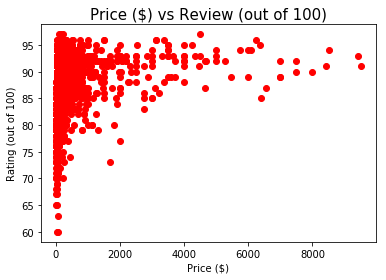

In [155]:
# FIGURE 1 - PRICE VS. REVIEW
from matplotlib import pyplot as plt
import seaborn as sns

plt.scatter(df['Price'],df['Review'], color = 'red')
plt.title('Price ($) vs Review (out of 100)', fontsize = 15)
plt.xlabel('Price ($)')
plt.ylabel('Rating (out of 100)')

Lets dig deeper and determine how the reviews are distributed. From FIGURE 2 we can see the the reviews are distributed around 85-95 out of 100. In general, if you were to pick a whiskey bottle randomly you would most likely pick a bottle that reviewed well. Lets dig deeper and determine the number of whiskey bottles by category

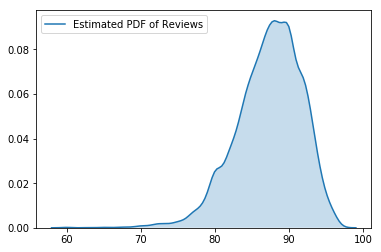

In [156]:
#FIGURE 2 - Review distribution
sns.kdeplot(df['Review'], shade = True, label = 'Estimated PDF of Reviews')

Lets dig deeper and determine the number of whiskey bottles by category - However lets focus on the top 10 by count.

Text(0, 0.5, 'Number of Whiskey Bottles')

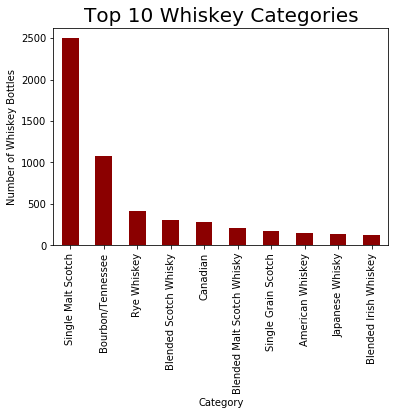

In [158]:
#FIGURE 3 - Category count (# of bottles)
df.groupby('Category')['Price'].count().sort_values(ascending = False).nlargest(10).plot.bar(color = 'darkred')
plt.title('Top 10 Whiskey Categories', fontsize = 20)
plt.xlabel('Category')
plt.ylabel('Number of Whiskey Bottles')

As expected there's a large number of single malts (Scotch) in excess of 2,000 bottles, followed by Bourbon. Before we take a closer look at each category lets determine the average review/price by category.

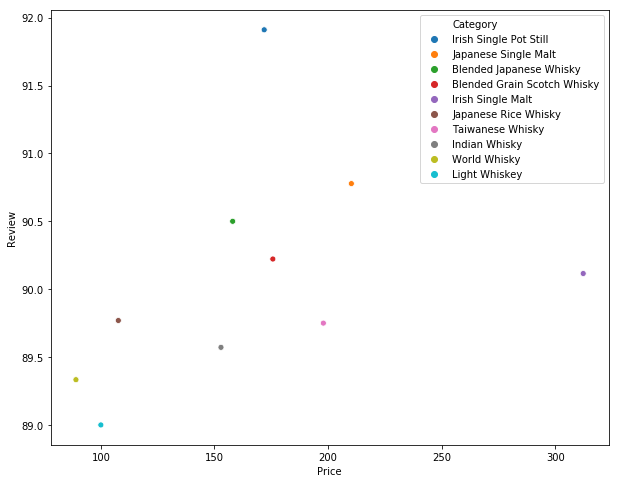

In [198]:
df_category = df.groupby('Category').agg({'Review':'mean','Price':'mean'}).sort_values(by ='Review',  ascending=False).nlargest(10,'Review').reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.scatterplot(df_category['Price'],df_category['Review'],hue=df_category['Category'])

#FIGURE 4 - Average Review vs Average Price for the top 10 category

From Figure 4, the 'Irish Single Pot Still' category on average contained the highest reviews at a price of < $200. Japanese whiskies are ranked second which is no surprise due to its high popularity. However, I would have expected Single Malt Scoth to be the list considering there are over 2,000 different whiskies in this category.

Now lets work on identifying a whiskey bottles with a high review that costs less $150

In [199]:
# Filter out whiskies greater than $150 + a review < 90
df_150 = df[(df['Review'] > 90) & (df['Price'] <= 150)]

Before we determine a pick of high review whiskies, lets look at the distribution for each whisky category by plotting a box plot by review and price.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

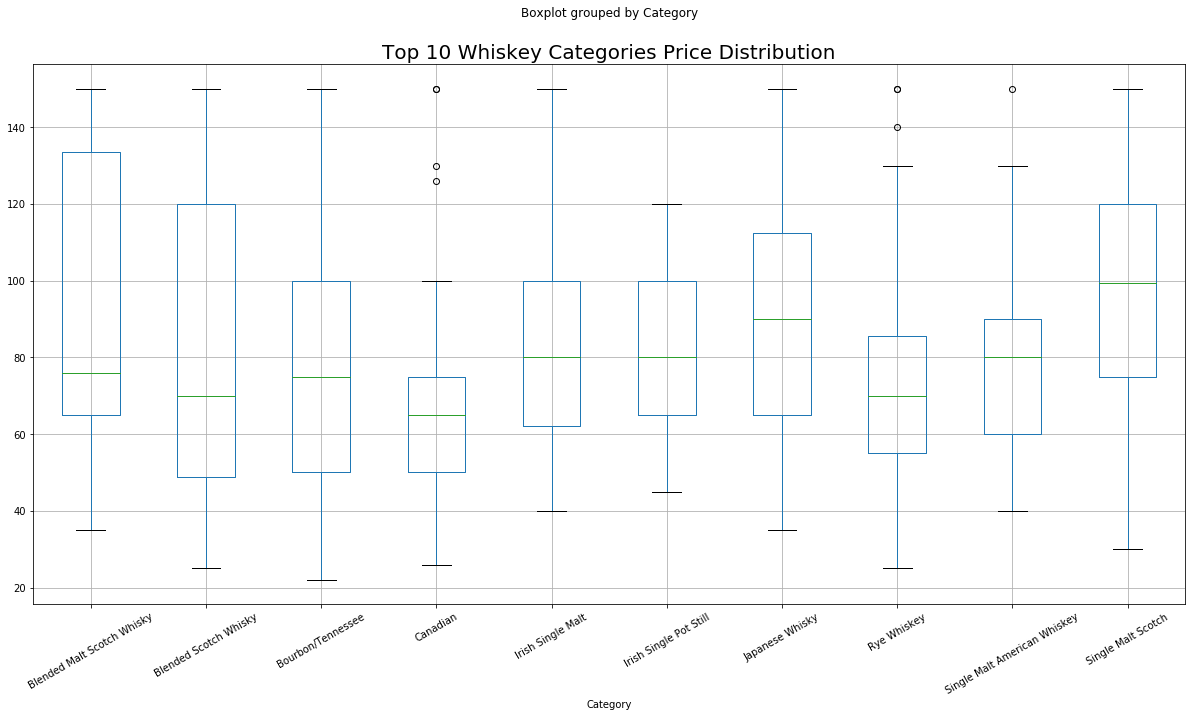

In [113]:
df_150_price = df_150[df_150['Category'].isin(df_150['Category'].value_counts().nlargest(10).index.tolist())]
df_150_price = df_150_price[['Category', 'Price']]
df_150_price.boxplot(by = 'Category', column = 'Price', figsize=(20,10))
plt.title('Top 10 Whiskey Categories Price Distribution', fontsize = 20)
plt.xticks(rotation = 30)

#FIGURE 5 - Boxplot by Category

Based on the price distribution, Single Malt Scoth cost more on average and Candian whiskies costing less. It's also worth noting that Blended Malt Scoth Whiskies have a greater dispersion.

Lets now plot a price box plot.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

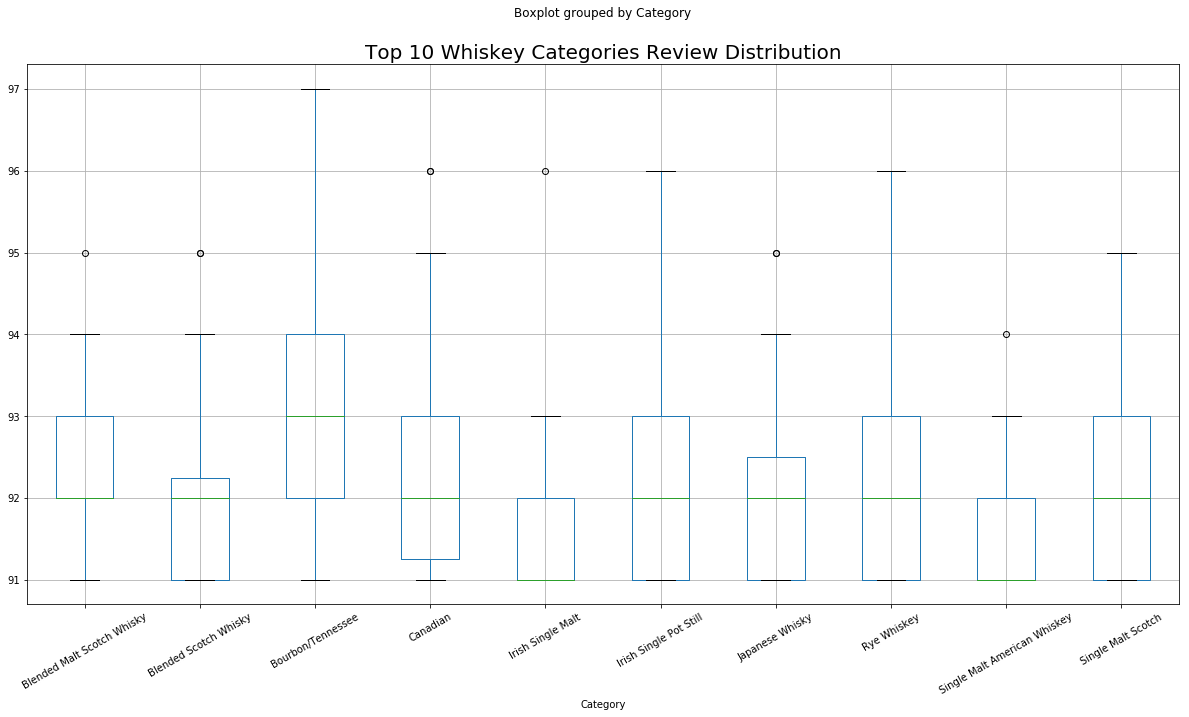

In [114]:
df_150_review = df_150[df_150['Category'].isin(df_150['Category'].value_counts().nlargest(10).index.tolist())]
df_150_review = df_150_review[['Category', 'Review']]
df_150_review.boxplot(by = 'Category', column = 'Review', figsize=(20,10))
plt.title('Top 10 Whiskey Categories Review Distribution', fontsize = 20)
plt.xticks(rotation = 30)

Based on the box plot, Bourbon/Tennessee on average yielded a greater review and Irish and American Single Malts not reviewed favorably. 


The top wwiskey of choice purely based on Price was two Bourbon whiskies called Parker's Heritage Collection, 'Golden Anniversary and our Roses Limited Edition Small Batch (2013 R..

In [127]:
pd.set_option('display.width', 1000)
df_150.sort_values(by=['Review'], ascending=False).nlargest(5,'Review')

,Brand,Title,Price,Alcohol_percentage,Review,Category,Reviewer
4823,Parker's Heritage Collection,"Parker's Heritage Collection, 'Golden Annivers...",150.0,50%,97,Bourbon/Tennessee,John Hansell
2376,Four Roses,Four Roses Limited Edition Small Batch (2013 R...,85.0,51.5%,97,Bourbon/Tennessee,John Hansell
3556,Jefferson's,"Jefferson’s Presidential Select, 18 year old, 47%",110.0,47%,96,Bourbon/Tennessee,John Hansell
1098,Buffalo Trace,"Thomas H. Handy, 66.35%",55.0,66.35%,96,Rye Whiskey,John Hansell
2336,Forty Creek,"Forty Creek Confederation Oak Reserve, 40%",70.0,40%,96,Canadian,John Hansell


For those interested in top ranked whiskies per category, a similar analysis was captured.

In [141]:
df_150.sort_values(['Category','Review'], ascending=False).groupby('Category').head(1).sort_values(by=['Review'], ascending=False)

,Brand,Title,Price,Alcohol_percentage,Review,Category,Reviewer
2376,Four Roses,Four Roses Limited Edition Small Batch (2013 R...,85.0,51.5%,97,Bourbon/Tennessee,John Hansell
1212,Bushmills,"Bushmills 21 year old, 40%",150.0,40%,96,Irish Single Malt,Jonny McCormick
1719,Crown Royal,"Crown Royal Monarch, 40%",75.0,40%,96,Canadian,Davin de Kergommeaux
2197,Exclusive Malts,The Exclusive Malts 13 year old 2002 (cask #20...,135.0,54.2%,96,Irish,Geoffrey Kleinman
5060,Redbreast,"Redbreast 12 year old, 40%",60.0,40%,96,Irish Single Pot Still,John Hansell
1098,Buffalo Trace,"Thomas H. Handy, 66.35%",55.0,66.35%,96,Rye Whiskey,John Hansell
4557,Nikka,"Yoichi 15 year old, 45%",119.0,45%,95,Japanese Whisky,Dave Broom
1576,Compass Box,Compass Box Flaming Heart (10th Anniversary bo...,105.0,48.9%,95,Blended Malt Scotch Whisky,John Hansell
1478,Chivas,"Chivas, 18 year old, 40%",70.0,40%,95,Blended Scotch Whisky,John Hansell
182,Ardbeg,"Ardbeg Corryvreckan, 57.1%",90.0,57.1%,95,Single Malt Scotch,Gavin Smith
